In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pickle

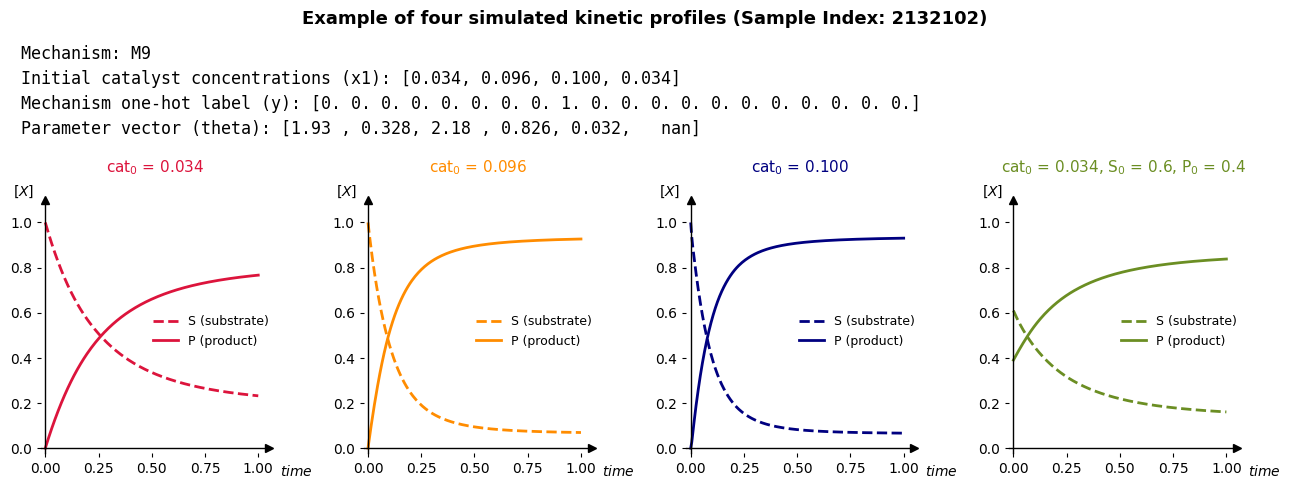

In [3]:
def plot_sample(
    x1, x2, y, idx=None,
    colors=['crimson', 'darkorange', 'navy', 'olivedrab']
):
    np.random.seed(726)
    if idx is None:
        idx = np.random.choice(x1.shape[0], 1)[0]
    fig, axes = plt.subplots(1, 4, figsize=(13, 5))

    x1_row = x1[idx]
    cat0s = x1_row[:3]
    if len(x1_row) >= 6:
        cat0_4, S0_4, P0_4 = x1_row[3], x1_row[4], x1_row[5]
    else:
        cat0_4 = x1_row[3]
        S0_4 = 1.0
        P0_4 = 0.0

    for j, ax in enumerate(axes):
        t = x2[idx, :, j*3 + 0]
        S = x2[idx, :, j*3 + 1]
        P = x2[idx, :, j*3 + 2]
        t_dense = np.linspace(t[0], t[-1], 200)
        S_smooth = interp1d(t, S, kind='cubic')(t_dense)
        P_smooth = interp1d(t, P, kind='cubic')(t_dense)

        ax.plot(t_dense, S_smooth, '--', color=colors[j], lw=2, label="S (substrate)")
        ax.plot(t_dense, P_smooth, '-', color=colors[j], lw=2, label="P (product)")

        xlim = (-0.02, 1.05)
        ylim = (-0.02, 1.1)
        ax.plot([xlim[0], xlim[1]], [0, 0], color='black', lw=1, clip_on=False)
        ax.plot([0, 0], [ylim[0], ylim[1]], color='black', lw=1, clip_on=False)
        ax.plot([xlim[1]], [0], marker='>', color='black', transform=ax.transData, clip_on=False)
        ax.plot([0], [ylim[1]], marker='^', color='black', transform=ax.transData, clip_on=False)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

        ax.text(-0.05, 1.1, r'$\mathit{[X]}$', fontsize=10, color='black', ha='right', va='bottom')
        ax.text(1.1, -0.07, r'$\mathit{time}$', fontsize=10, color='black', ha='left', va='top')

        if j < 3:
            ax.set_title(f"cat$_0$ = {cat0s[j]:.3f}", fontsize=11, color=colors[j], pad=20)
        else:
            ax.set_title(
                f"cat$_0$ = {cat0_4:.3f}, S$_0$ = 0.6, P$_0$ = 0.4",
                fontsize=11, color=colors[j], pad=20
            )

        ax.tick_params(axis='both', labelsize=10, colors='black', direction='out', length=3)
        for spine in ax.spines.values():
            spine.set_visible(False)
        ax.legend(
            loc="center right",
            bbox_to_anchor=(1.05, 0.48),
            fontsize=9,
            frameon=False
        )

    plt.tight_layout(w_pad=1.5)
    plt.subplots_adjust(top=0.6)

    if y.ndim == 2 and y.shape[1] == 1:
        mech = int(y[idx, 0]) + 1
    elif y.ndim == 2 and y.shape[1] == 20:
        mech = int(np.argmax(y[idx])) + 1
    else:
        mech = int(y[idx]) + 1
        
    x1_vals = x1[idx]
    x1_str = "[" + ", ".join([f"{v:.3f}" for v in x1_vals]) + "]"

    y_str = np.array2string(y[idx], max_line_width=160)
    theta_str = np.array2string(theta[idx], precision=3, separator=', ', suppress_small=True)
    
    plt.suptitle(
        f'Example of four simulated kinetic profiles (Sample Index: {idx})',
        fontsize=13,
        fontweight='bold'
    )
    
    plt.figtext(
        0.02, 0.91, f"Mechanism: M{mech}",
        fontsize=12, ha='left', va='top', family='monospace'
    )
    plt.figtext(
        0.02, 0.86, f"Initial catalyst concentrations (x1): {x1_str}",
        fontsize=12, ha='left', va='top', family='monospace'
    )
    plt.figtext(
        0.02, 0.81, f"Mechanism one-hot label (y): {y_str}",
        fontsize=12, ha='left', va='top', family='monospace'
    )
    plt.figtext(
        0.02, 0.76, f"Parameter vector (theta): {theta_str}",
        fontsize=12, ha='left', va='top', family='monospace'
    )
    
    plt.show()

data_dir = 'simulation_data'
x1 = pickle.load(open(f"{data_dir}/x1_train_M1_M20.pkl", 'rb'))
x2 = pickle.load(open(f"{data_dir}/x2_train_M1_M20.pkl", 'rb'))
y = pickle.load(open(f"{data_dir}/y_train_M1_M20.pkl", 'rb'))
theta = pickle.load(open(f"{data_dir}/theta_train_M1_M20.pkl", 'rb'))

plot_sample(x1, x2, y, idx=None)